In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

## Prophet

### Hyperparameters

In [9]:
df = pd.read_csv("../../results/tuning/prophet.csv", sep=";")
metric = "MAE"

#### Seasonality

DailySeasonality
auto     0.137708
false    0.084698
true     0.023397
Name: MAE, dtype: float64


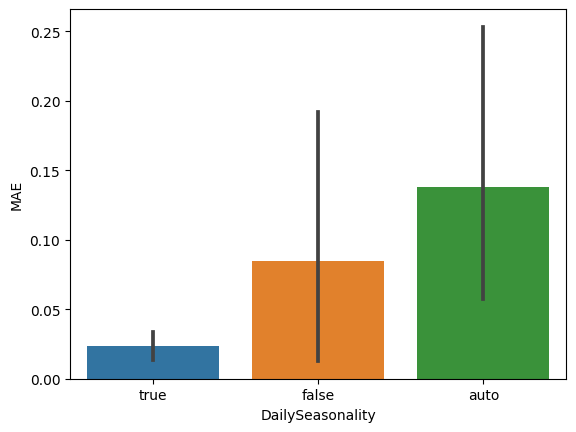

In [10]:
print(df.groupby("DailySeasonality")[metric].mean())
sns.barplot(x="DailySeasonality", y=metric, data=df);

WeeklySeasonality
auto     0.131339
false    0.012952
true     0.120618
Name: MAE, dtype: float64


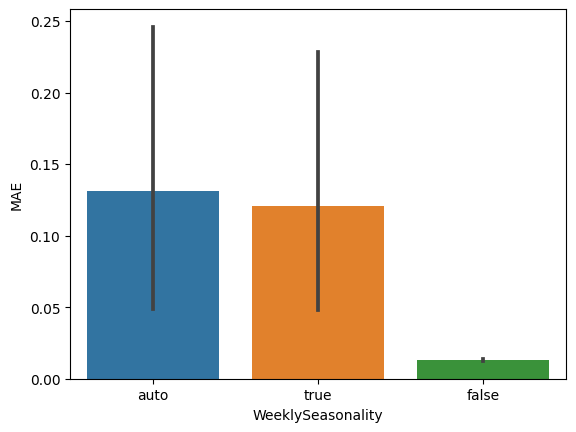

In [11]:
print(df.groupby("WeeklySeasonality")[metric].mean())
sns.barplot(x="WeeklySeasonality", y=metric, data=df);

YearlySeasonality
auto     0.060416
false    0.084887
true     0.332375
Name: MAE, dtype: float64


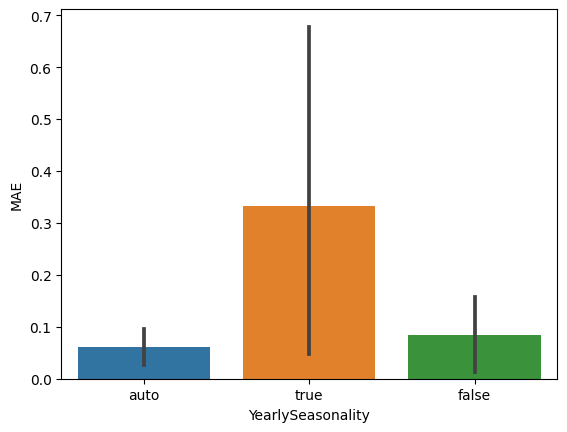

In [12]:
print(df.groupby("YearlySeasonality")[metric].mean())
sns.barplot(x="YearlySeasonality", y=metric, data=df);

#### Look Back Window Size

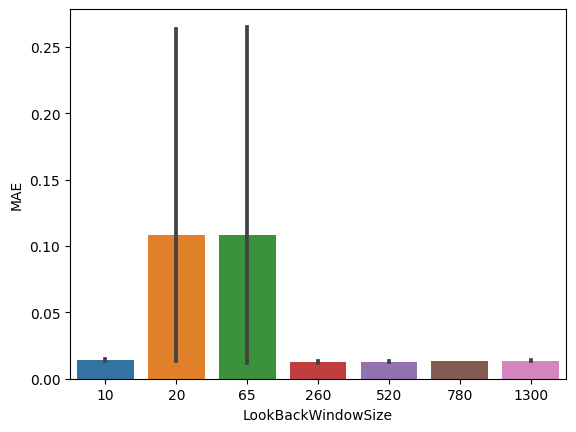

In [17]:
sns.barplot(x="LookBackWindowSize", y=metric, data=df[(df["DailySeasonality"]=="true") | (df["WeeklySeasonality"]=="false") | (df["YearlySeasonality"]=="false")]);

### Specific Comparison

100 validations of Prophet(growth="flat", daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False) with new validation metrics

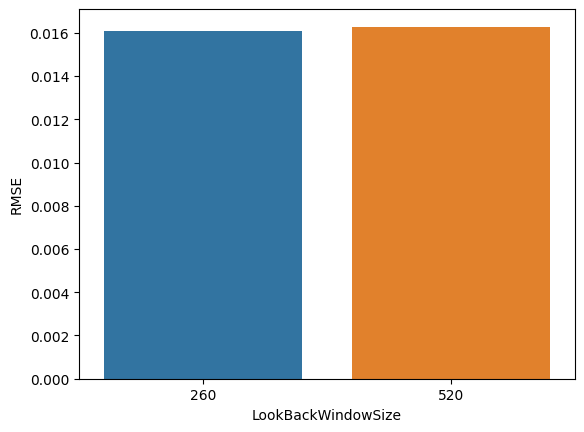

In [23]:
specific = pd.read_csv("../../results/tuning/prophet_specific.csv", sep=";")
sns.barplot(x="LookBackWindowSize", y="RMSE", data=specific);

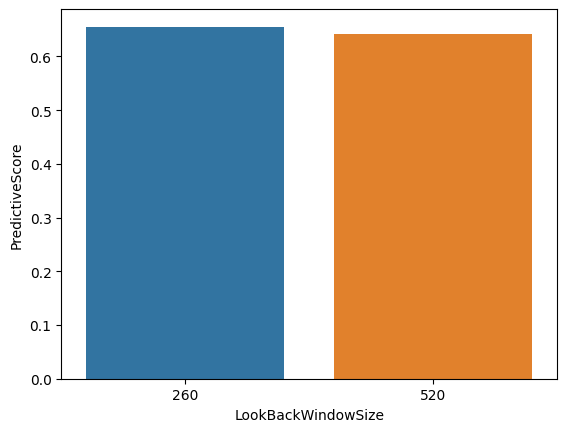

In [24]:
sns.barplot(x="LookBackWindowSize", y="PredictiveScore", data=specific);

### Conclusion
- Set 'daily_seasonality' to True, but 'weekly_seasonality' and 'yearly_seasonality' to False.
- Set 'look_back_window_size' to 260 (1 year).